In [ ]:
#1 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#2 Set dark theme for plots
plt.style.use("dark_background")
sns.set_palette("bright")

In [ ]:
#3 Helper function to format plots
def format_plot(title, xlabel, ylabel):
    plt.title(title, color='white', fontsize=14)
    plt.xlabel(xlabel, color='white', fontsize=12)
    plt.ylabel(ylabel, color='white', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().tick_params(colors='white')

In [ ]:
#4 Import games paid users data as users
df = pd.read_csv('../data/final_games_dataset.csv')
print(users.dtypes)
print(users.head())

user_id                    object
game_name                  object
payment_month              object
total_revenue             float64
total_revenue_previous    float64
status                     object
age                         int64
has_older_device_model       bool
language                   object
dtype: object
                    user_id game_name payment_month  total_revenue  \
0  +Awa0l8QDZ6iKBSRiA6dRQ==    game 3    2022-03-01            0.0   
1  +Awa0l8QDZ6iKBSRiA6dRQ==    game 3    2022-04-01            0.0   
2  +Awa0l8QDZ6iKBSRiA6dRQ==    game 3    2022-05-01            0.0   
3  +Awa0l8QDZ6iKBSRiA6dRQ==    game 3    2022-06-01            0.0   
4  +Awa0l8QDZ6iKBSRiA6dRQ==    game 3    2022-07-01            0.0   

   total_revenue_previous    status  age  has_older_device_model language  
0                     0.0  deactive   16                   False       ru  
1                     0.0  deactive   16                   False       ru  
2                     0.0  deac

In [ ]:
#5 Convert payment_date to datetime
df['payment_month'] = pd.to_datetime(df['payment_month'])

MRR:
 payment_month
2022-03    1490.52
2022-04    3600.36
2022-05    4339.41
2022-06    5170.86
2022-07    6791.55
2022-08    7616.94
2022-09    7922.40
2022-10    9343.86
2022-11    8424.99
2022-12    8439.78
Name: total_revenue, dtype: float64


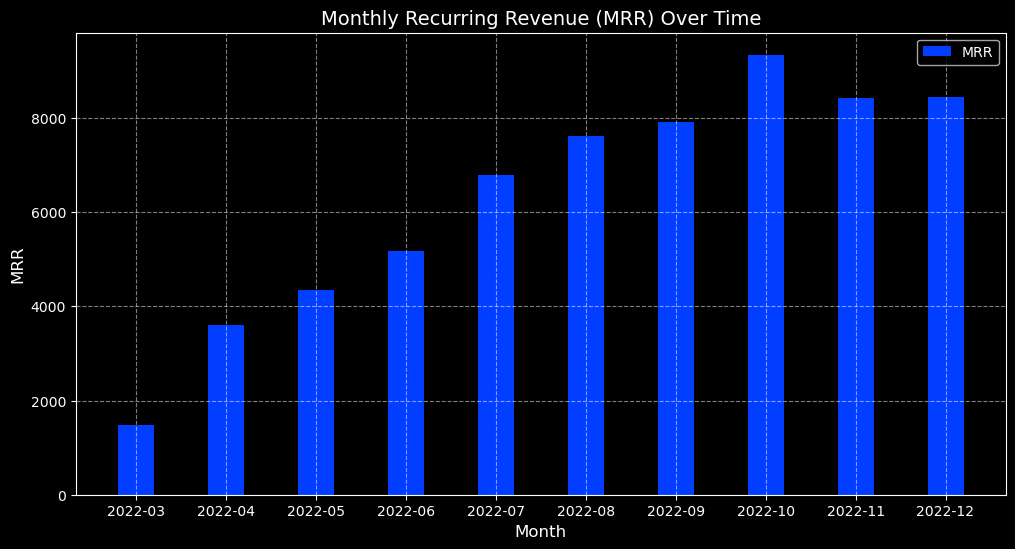

In [ ]:
#6 Calculating Monthly Recurring Revenue
mrr = df[df['status'].isin(['active', 'back','new'])].groupby(df['payment_month'].dt.strftime('%Y-%m'))['total_revenue'].sum()
print("MRR:\n", mrr)
plt.figure(figsize=(12, 6))
plt.bar(mrr.index, mrr.values, label='MRR', width=.4)
format_plot('Monthly Recurring Revenue (MRR) Over Time', 'Month', 'MRR')
plt.show()

Paid Users:
 payment_month
2022-03     43
2022-04     73
2022-05    100
2022-06    111
2022-07    145
2022-08    165
2022-09    179
2022-10    199
2022-11    188
2022-12    189
Name: user_id, dtype: int64


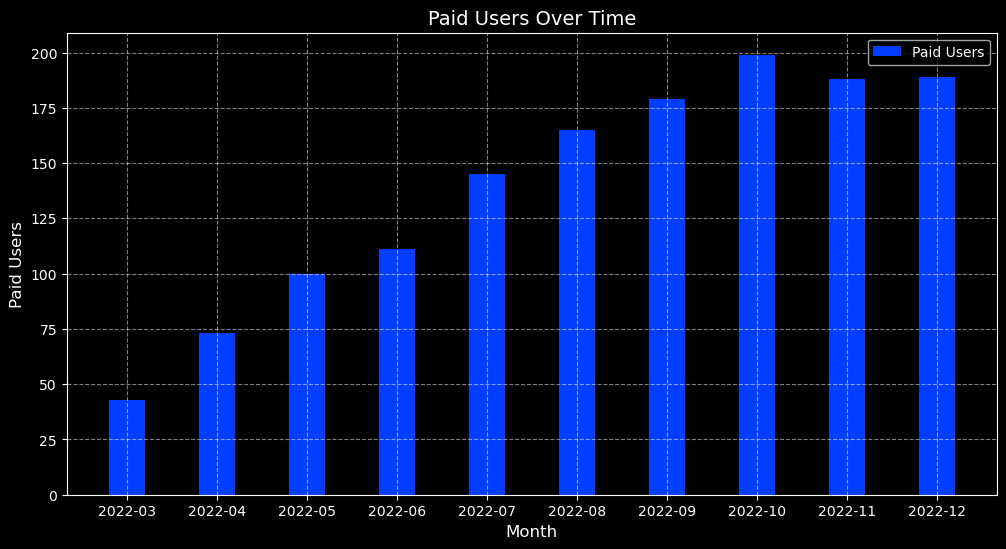

In [ ]:
#7 Calculating Paid Users
paid_users = df[df['total_revenue'] > 0].groupby(df['payment_month'].dt.strftime('%Y-%m'))['user_id'].nunique()
print("Paid Users:\n", paid_users)
plt.figure(figsize=(12, 6))
plt.bar(paid_users.index, paid_users.values, label='Paid Users', width=.4)
format_plot('Paid Users Over Time', 'Month', 'Paid Users')
plt.show()

ARPPU:
 payment_month
2022-03    34.66
2022-04    49.32
2022-05    43.39
2022-06    46.58
2022-07    46.84
2022-08    46.16
2022-09    44.26
2022-10    46.95
2022-11    44.81
2022-12    44.65
dtype: float64


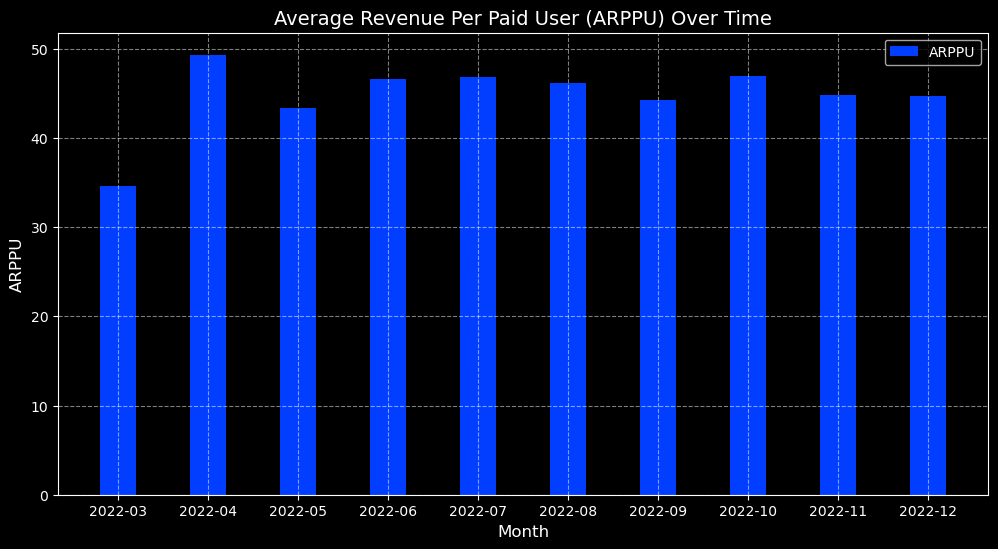

In [39]:
#8 Calculating Average Revenue Per Paid User (ARPPU)
arppu = (mrr / paid_users).round(2)
print("ARPPU:\n", arppu)
plt.figure(figsize=(12, 6))
plt.bar(arppu.index, arppu.values, label='ARPPU', width=.4)
format_plot('Average Revenue Per Paid User (ARPPU) Over Time', 'Month', 'ARPPU')
plt.show()


Paid Users: payment_month
2022-03    43
2022-04    41
2022-05    40
2022-06    27
2022-07    44
2022-08    50
2022-09    38
2022-10    41
2022-11    27
2022-12    32
Name: user_id, dtype: int64


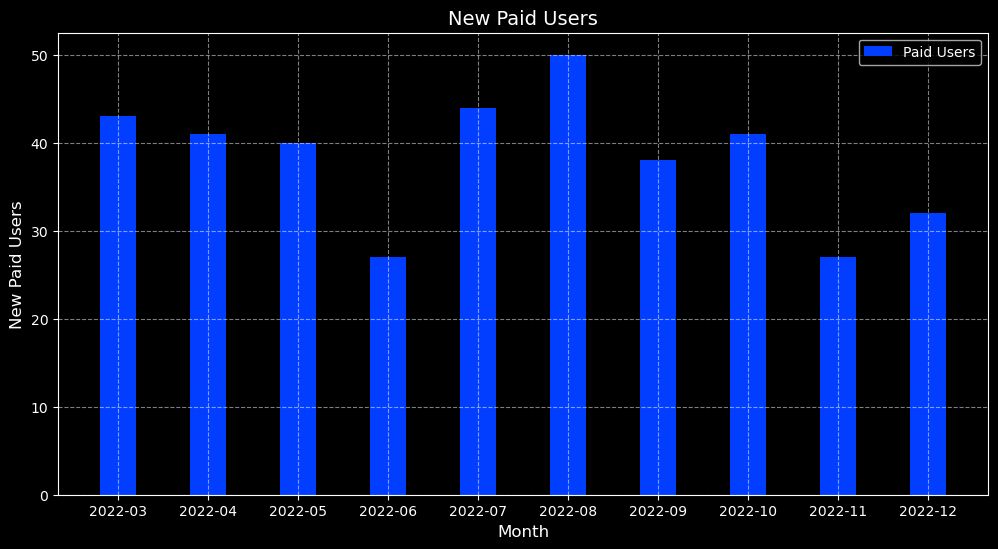

In [41]:
#9 Calculating New Paid Users
new_paid_users = df[(df['status'] == 'new') & (df['total_revenue'] > 0)].groupby(df['payment_month'].dt.strftime('%Y-%m'))['user_id'].nunique()
print("Paid Users:", new_paid_users)
plt.figure(figsize=(12, 6))
plt.bar(new_paid_users.index, new_paid_users.values, label='Paid Users', width=.4)
format_plot('New Paid Users', 'Month', 'New Paid Users')
plt.show()

New MRR:
 payment_month
2022-03    1490.52
2022-04    1749.51
2022-05    1572.78
2022-06     985.29
2022-07    1391.91
2022-08    1991.16
2022-09    1406.22
2022-10    1467.69
2022-11     862.53
2022-12    1267.92
Name: total_revenue, dtype: float64


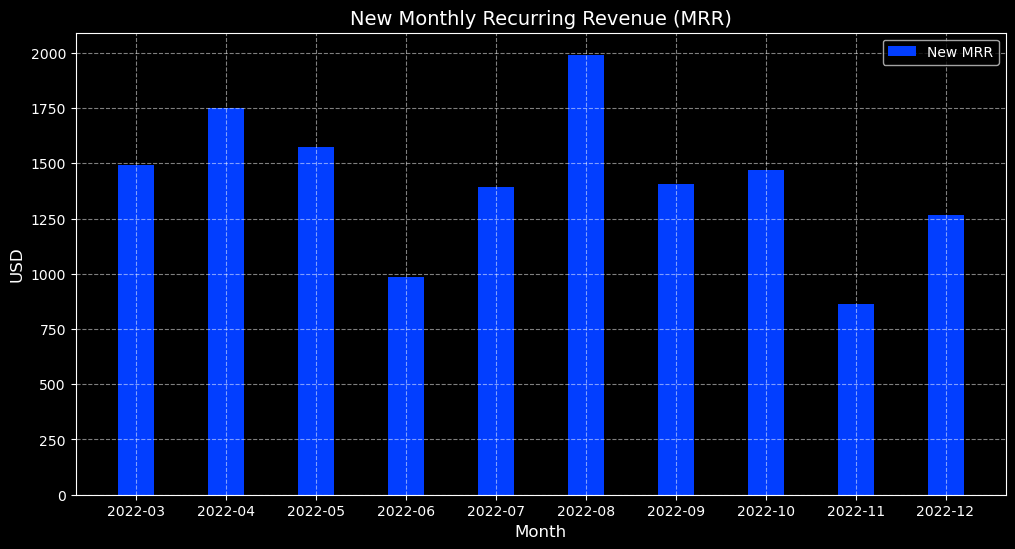

In [ ]:
# 10 Calculating New Monthly Recurring Revenue (MRR)
new_mrr = df[(df['status'] == 'new') & (df['total_revenue'] > 0)].groupby(df['payment_month'].dt.strftime('%Y-%m'))['total_revenue'].sum().round(2)
print('New MRR:\n', new_mrr)
plt.figure(figsize=(12, 6))
plt.bar(new_mrr.index, new_mrr.values, label='New MRR', width=.4)
format_plot('New Monthly Recurring Revenue (MRR)', 'Month', 'USD')
plt.show()

Churned Users:
 payment_month
2022-04    11
2022-05    19
2022-06    26
2022-07    22
2022-08    41
2022-09    46
2022-10    46
2022-11    71
2022-12    64
Name: user_id, dtype: int64


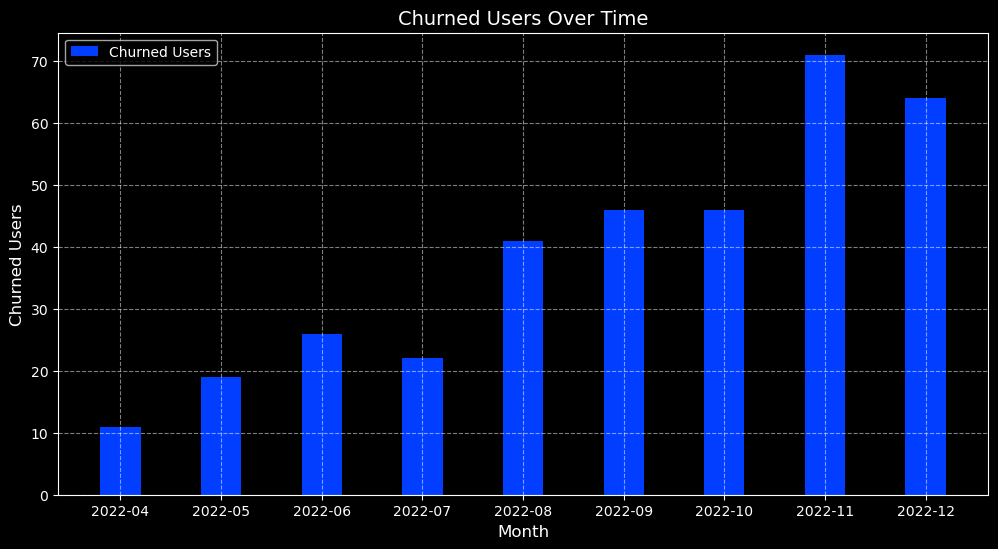

In [47]:
#11 Calculating Churned Users
churned_users = df[df['status'] == 'churn'].groupby(df['payment_month'].dt.strftime('%Y-%m'))['user_id'].nunique()
print("Churned Users:\n", churned_users)
plt.figure(figsize=(12, 6))
plt.bar(churned_users.index, churned_users.values, label='Churned Users', width=.4)
format_plot('Churned Users Over Time', 'Month', 'Churned Users')
plt.show()

Churn Rate:
 payment_month
2022-03     NaN
2022-04    0.26
2022-05    0.26
2022-06    0.26
2022-07    0.20
2022-08    0.28
2022-09    0.28
2022-10    0.26
2022-11    0.36
2022-12    0.34
Name: user_id, dtype: float64


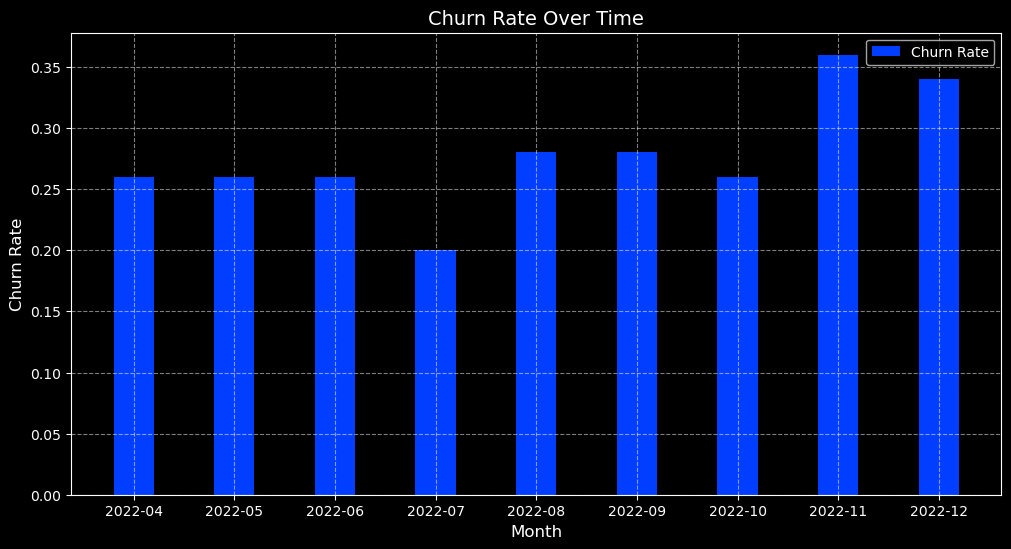

In [49]:
# 12 Calculating Churn Rate
paid_users_shifted = paid_users.shift(1)
churn_rate = (churned_users / paid_users_shifted).round(2)
print("Churn Rate:\n", churn_rate)
plt.figure(figsize=(12, 6))
plt.bar(churn_rate.index, churn_rate.values, label='Churn Rate', width=.4)
format_plot('Churn Rate Over Time', 'Month', 'Churn Rate')
plt.show()

Churned Revenue:
 payment_month
2022-04     299.16
2022-05     629.97
2022-06     979.98
2022-07     879.54
2022-08    1518.72
2022-09    1361.52
2022-10    1734.18
2022-11    2800.26
2022-12    1946.58
Name: total_revenue_previous, dtype: float64


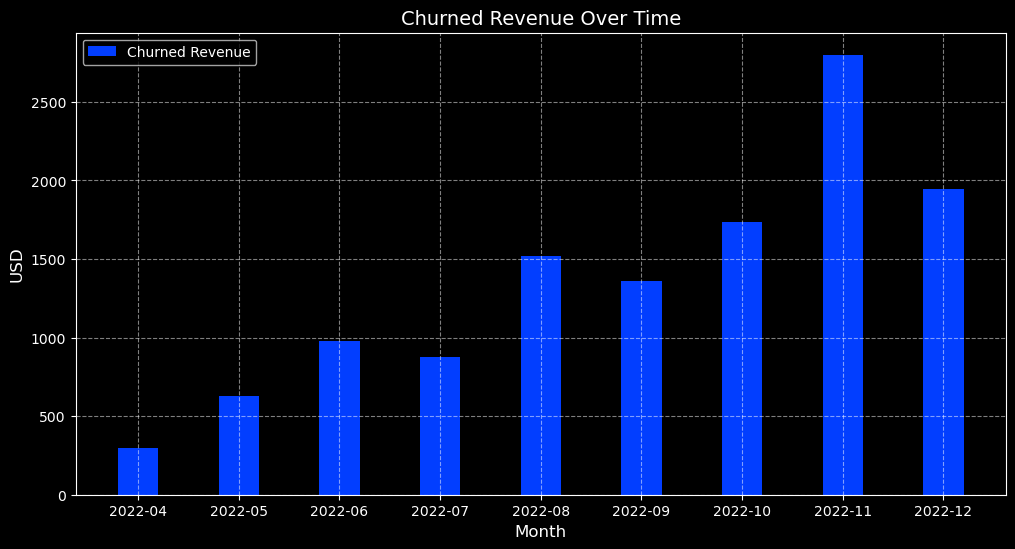

In [51]:
# 13 Calculating Churned Revenue
churned_revenue = df[df['status'] == 'churn'].groupby(df['payment_month'].dt.strftime('%Y-%m'))['total_revenue_previous'].sum().round(2)
print("Churned Revenue:\n", churned_revenue)
plt.figure(figsize=(12, 6))
plt.bar(churned_revenue.index, churned_revenue.values, label='Churned Revenue', width=.4)
format_plot('Churned Revenue Over Time', 'Month', 'USD')
plt.show()

Revenue Churn Rate:
 payment_month
2022-03     NaN
2022-04    0.20
2022-05    0.17
2022-06    0.23
2022-07    0.17
2022-08    0.22
2022-09    0.18
2022-10    0.22
2022-11    0.30
2022-12    0.23
dtype: float64


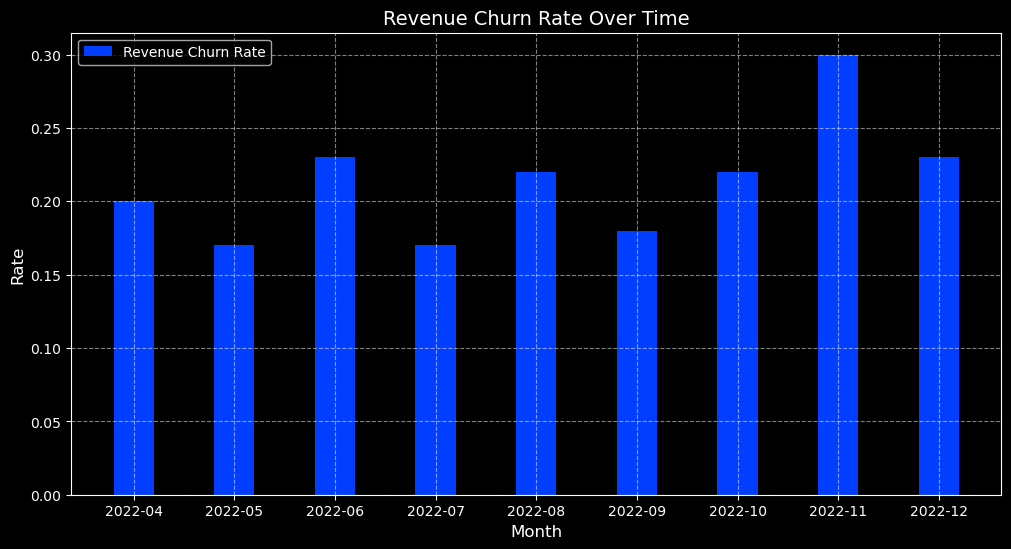

In [52]:
#14 Revenue Churned Rate
mrr_shifted = mrr.shift(1)
revenue_churn_rate = (churned_revenue / mrr_shifted).round(2)
print("Revenue Churn Rate:\n", revenue_churn_rate)
plt.figure(figsize=(12, 6))
plt.bar(revenue_churn_rate.index, revenue_churn_rate.values, label='Revenue Churn Rate', width=.4)
format_plot('Revenue Churn Rate Over Time', 'Month', 'Rate')
plt.show()

Expansion MRR:
 payment_month
2022-04     886.65
2022-05     603.51
2022-06    1149.36
2022-07    1807.50
2022-08    1549.95
2022-09    1385.43
2022-10    2442.81
2022-11    2163.72
2022-12    1713.03
dtype: float64


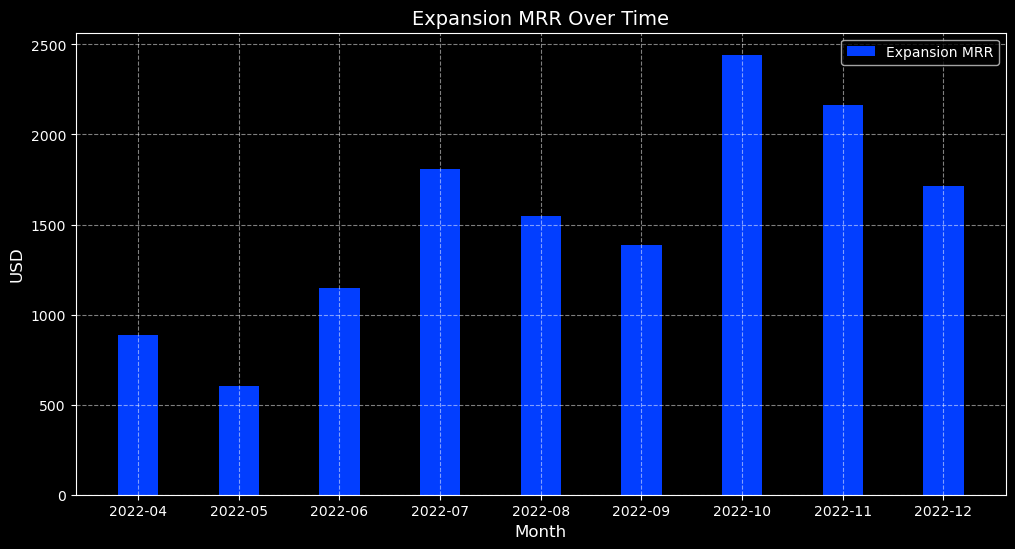

In [54]:
# 15 Expension MRR
expansion_mrr = df[(df['status'] == 'active') & (df['total_revenue'] > df['total_revenue_previous'])].groupby(df['payment_month'].dt.strftime('%Y-%m')).apply(lambda x: (x['total_revenue'] - x['total_revenue_previous']).sum()).round(2)
print("Expansion MRR:\n", expansion_mrr)
plt.figure(figsize=(12, 6))
plt.bar(expansion_mrr.index, expansion_mrr.values, label='Expansion MRR', width=.4)
format_plot('Expansion MRR Over Time', 'Month', 'USD')
plt.show()


Contraction MRR:
 payment_month
2022-04    -227.16
2022-05   -1051.71
2022-06    -928.05
2022-07   -1197.03
2022-08   -1586.37
2022-09   -1739.91
2022-10   -1800.60
2022-11   -2291.16
2022-12   -2380.68
dtype: float64


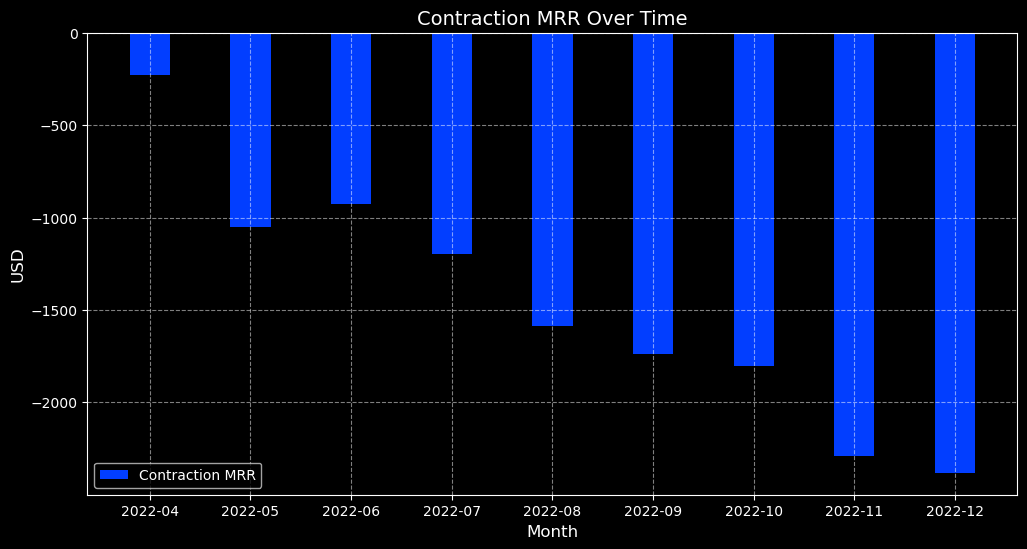

In [56]:
#16. Calculating Contraction MRR
contraction_mrr = df[(df['status'] == 'active') & (df['total_revenue'] < df['total_revenue_previous'])].groupby(df['payment_month'].dt.strftime('%Y-%m')).apply(lambda x: (x['total_revenue'] - x['total_revenue_previous']).sum())
print("Contraction MRR:\n", contraction_mrr)
plt.figure(figsize=(12, 6))
plt.bar(contraction_mrr.index, contraction_mrr.values, label='Contraction MRR', width=.4)
format_plot('Contraction MRR Over Time', 'Month', 'USD')
plt.show()